In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [94]:
df = pd.read_excel('dataset.xlsx')

In [95]:
df.head()

,card_nm,card_id,receive_dt,use_dt
0,Beta,7637320,2020-11-02,NaT
1,Alpha,7635974,2020-11-02,NaT
2,Alpha,7635511,2020-11-02,NaT
3,Gamma,7635258,2020-11-02,2020-12-13
4,Beta,7634217,2020-11-02,NaT


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   card_nm     6764 non-null   object        
 1   card_id     6764 non-null   int64         
 2   receive_dt  6764 non-null   datetime64[ns]
 3   use_dt      1594 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 211.5+ KB


Добавим переменную, отвечающую за то, использовали ли купон или нет

In [97]:
df['is_used'] = (~df['use_dt'].isna()).astype(int)

In [98]:
data1 = df.groupby('card_nm').agg(used_num=('is_used', 'sum'), all_num=('card_nm', 'count'))
data1['percentage_of_usage'] = data1['used_num']/data1['all_num']
data1

,used_num,all_num,percentage_of_usage
card_nm,,,
Alpha,812,3570,0.227451
Beta,89,1272,0.069969
Gamma,693,1922,0.360562


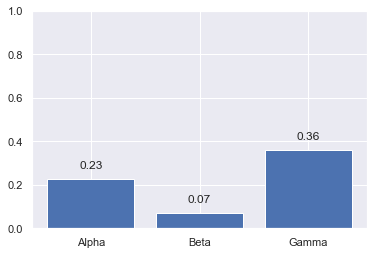

In [99]:
plt.bar(data1.index, data1['percentage_of_usage'])

for x,y in zip(data1.index, data1['percentage_of_usage']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.ylim(top=1)
plt.show();

Видно, что лучшая конферсия у Gamma, затем идет Alpha и потом Beta.
Рассмотрим только те купоны, которые использовали

In [100]:
df_used = df[df['is_used']==1].reset_index()
df_used['period_use'] = df_used['use_dt']-df_used['receive_dt']

In [101]:
df_used

,index,card_nm,card_id,receive_dt,use_dt,is_used,period_use
0,3,Gamma,7635258,2020-11-02,2020-12-13,1,41 days
1,15,Alpha,7615628,2020-11-02,2020-11-11,1,9 days
2,29,Alpha,7597753,2020-11-03,2020-11-05,1,2 days
3,30,Gamma,7597579,2020-11-03,2020-12-10,1,37 days
4,31,Alpha,7597009,2020-11-03,2020-11-27,1,24 days
...,...,...,...,...,...,...,...
1589,6635,Beta,780967,2021-04-05,2021-04-10,1,5 days
1590,6652,Beta,755466,2021-04-06,2021-04-10,1,4 days
1591,6662,Alpha,744894,2021-04-06,2021-04-09,1,3 days
1592,6698,Alpha,704016,2021-04-07,2021-04-07,1,0 days


Посмотрим количество дней, за сколько потратили купон. 
Видно, что Гамма купоны сильно отличаются от остальных. Посмотрим минимальную и максимальную дату погашения.

In [102]:
df_used.groupby('card_nm')['period_use'].mean().dt.days

card_nm
Alpha    13
Beta     12
Gamma    37
Name: period_use, dtype: int64

In [103]:
df_used['use_day']=df_used['period_use'].dt.days

In [104]:
df_used.groupby('card_nm')['period_use'].agg(['min', max])

,min,max
card_nm,,
Alpha,0 days,60 days
Beta,1 days,60 days
Gamma,30 days,58 days


Можно заметить, что купоны Гамма начинают использовать только спустя 30 дней после покупки.

In [106]:
df_used

,index,card_nm,card_id,receive_dt,use_dt,is_used,period_use,use_day
0,3,Gamma,7635258,2020-11-02,2020-12-13,1,41 days,41
1,15,Alpha,7615628,2020-11-02,2020-11-11,1,9 days,9
2,29,Alpha,7597753,2020-11-03,2020-11-05,1,2 days,2
3,30,Gamma,7597579,2020-11-03,2020-12-10,1,37 days,37
4,31,Alpha,7597009,2020-11-03,2020-11-27,1,24 days,24
...,...,...,...,...,...,...,...,...
1589,6635,Beta,780967,2021-04-05,2021-04-10,1,5 days,5
1590,6652,Beta,755466,2021-04-06,2021-04-10,1,4 days,4
1591,6662,Alpha,744894,2021-04-06,2021-04-09,1,3 days,3
1592,6698,Alpha,704016,2021-04-07,2021-04-07,1,0 days,0


Посмотрим на график использования купонов разных групп

In [107]:
used_coupons_by_day = df_used.groupby(['card_nm', 'use_day'])['is_used'].count()

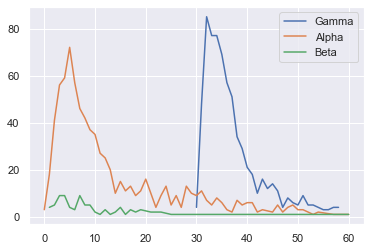

In [108]:
fig = plt.figure()
for group in df_used['card_nm'].unique():
    plt.plot(used_coupons_by_day.loc[group,], label=group)
plt.legend()
plt.show();

Видно, что купоны Бета не пользуются большим спросом. Купоны Альфа и Гамма начинают использовать с начала их действия, затем количество использований уменьшается.
Рассмотрим также кумулятивную сумму.

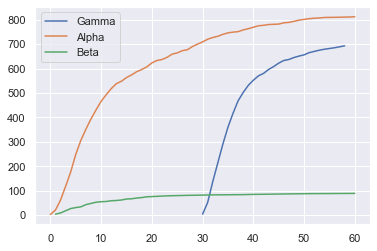

In [120]:
fig = plt.figure()
for group in df_used['card_nm'].unique():
    plt.plot(used_coupons_by_day.loc[group,].cumsum(), label=group)
plt.legend()
plt.show();

In [110]:
df_used.groupby('card_nm')['card_nm'].agg(['count'])

,count
card_nm,
Alpha,812
Beta,89
Gamma,693


In [121]:
used_coupons_by_day

card_nm  use_day
Alpha    0           3
         1          18
         2          41
         3          56
         4          59
                    ..
Gamma    54          4
         55          3
         56          3
         57          4
         58          4
Name: is_used, Length: 117, dtype: int64